# Assignment 1
### CHEM ENG/ SEP 787

### XuLiang Qi - 
### Mohammad Kashif Siddiqui - 0755452

### Headers

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import math
import random as rn
import time
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Checking paths

In [8]:
print('current path:')
dir_path = os.getcwd()
print(dir_path)

current path:
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_787


# Question 1
#### Using the comma separated multivariate data in the file fld.txt:

#### (a) Determine the discriminant line found by Fishers Linear Discriminant.

#### (b) Plot both the data and the discriminant line on a scatter plot

#### (c) Using this line, determine the class of each of the data points in the training dataset, assuming that the threshold is 0 (i.e. positive values are in one class and negative values in the other). 

#### (d) Determine what percentage of data points are incorrectly classifier


In [9]:
# Reading the data
tic = time.clock()
data = pd.read_csv('fld.txt', header = None)
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time in seconds:', (toc - tic))

Elapsed time in seconds: 0.004659500000002481


In [34]:
# loading the data to an array and separating classes

x1=data[0:300,0:2]    # class = 1
x2=data[300:500, 0:2] # class = 0

test_labels = data[:,2]

# Calculate the mean for each group
u1 = np.mean(x1, axis = 0)
u2 = np.mean(x2, axis = 0)

Elapsed time for inclass method in seconds: 0.000679100000525068
Elapsed time for scikit in seconds: 0.0017660000003161258


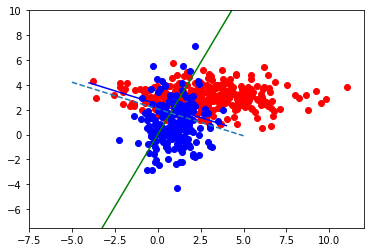

In [41]:
# Remove the mean for each group
tic = time.clock()

x1ur = x1 - u1
x2ur = x2 - u2

# Calculate the Cov for each group
cov1 = np.dot(x1ur.T, x1ur)
cov2 = np.dot(x2ur.T, x2ur)

# Answer to Q1 a
# FLD using the method from class
sw = cov1 + cov2
w = np.dot(np.linalg.inv(sw), (u1 - u2))

toc = time.clock()
print('Elapsed time for inclass method in seconds:', (toc - tic))


# Plt
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.plot([-10000 * w[0], 10000 * w[0]], [-10000 * w[1], 10000 * w[1]], 'g') #green broken line in the plot
ax=plt.gca()
ax.set_xlim(-7.5,12)
ax.set_ylim(-7.5,10)


# Scikitlearn
tic = time.clock()

X = np.concatenate((x1, x2), axis = 0)
y = data[:, 2]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
p_lda = lda.predict(X)
error_lda = np.sum(abs(p_lda - data[:,2]))
slope_sk = -lda.coef_[0][0]/lda.coef_[0][1]
thresh_sk = -lda.intercept_/lda.coef_[0][1]

toc = time.clock()
print('Elapsed time for scikit in seconds:', (toc - tic))

x = np.linspace(-4, 4, 50) 
y = thresh_sk + slope_sk * x
plt.plot(x, y, c='b') # blue solid line in the plot is the Scikit learn discriminant line


# Answer to Q1b
# Plot the FLD line
x = np.linspace(-5,5,100)
y = slope*x + y_int
plt.plot(x, y, '--')
plt.show()


# Prediction and Precision
thresh = -0.005
slope = -w[0] / w[1]
y_int = -thresh / w[1]
a=np.sign(np.dot(w, data[:, (0, 1)].T) +thresh)

# Answer to Q1 c
prediction = (np.sign(np.dot(w, data[:, (0, 1)].T) +thresh) + 1) / 2
Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)

# Answer to Q1 d
error = np.sum(abs(prediction - data[:,2]))
percentage = error / len(data)



In [28]:
percentage

0.16

In [39]:
Conf_mat 

array([[135,  65],
       [ 15, 285]], dtype=int64)

# Question 2.

#### a) Using the multivariate data in the file spam.xlsx, determine the discriminant line found by Fishers Linear Discriminant. Using this line, determine the class of each of the data points in the training dataset, assuming that the threshold is 0.

#### b) Determine what percentage of the training data points are incorrectly classified by your classifier.

#### c) Perform the above analysis using only my implementation in Python and report the minimum error you could obtain by adjusting the threshold. For that minimum error value of the threshold, report the confusion matrix when classifying the training data.

In [43]:
# Reading the data
tic = time.clock()
data = pd.read_excel('spam.xlsx')
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time in seconds:', (toc - tic))

Elapsed time in seconds: 3.2602251000007527


In [47]:
# loading the data to an array and separating classes

x1=data[0:500,0:57]    # class = 1
x2=data[500:1000, 0:57] # class = 0

test_labels = data[:,57]

# Calculate the mean for each group
u1 = np.mean(x1, axis = 0)
u2 = np.mean(x2, axis = 0)

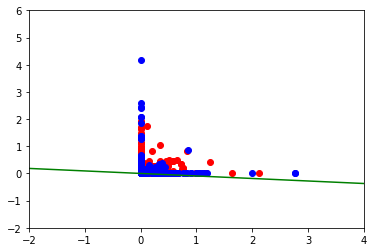

In [52]:
# Remove the mean for each group
x1ur = x1 - u1
x2ur = x2 - u2

# Calculate the Cov for each group
cov1 = np.dot(x1ur.T, x1ur)
cov2 = np.dot(x2ur.T, x2ur)

# FLD
sw = cov1 + cov2
w = np.dot(np.linalg.inv(sw), (u1 - u2))

# Plt
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.plot([-10000 * w[0], 10000 * w[0]], [-10000 * w[1], 10000 * w[1]], 'g')
ax=plt.gca()
ax.set_xlim(-2,4)
ax.set_ylim(-2,6)
plt.show()

# Prediction and Precision
# thresh set to -0.001 for a better percentage in precision(0.101; 0.183 when thresh = 0)
thresh = -0.00247
slope = -w[0] / w[1]
y_int = -thresh / w[1]

# Answer to Q2 b
prediction = (np.sign(np.dot(w, data[:, 0:57].T) +thresh) + 1) / 2
error = np.sum(abs(data[:,57] - prediction))
percentage = error / len(data)

# Answer to Q2 c
Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)

In [53]:
Conf_mat

array([[458,  42],
       [ 37, 463]], dtype=int64)

In [1]:
# -*- coding: utf-8 -*-
"""A1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1cHwBf5rOCp-iSht61caf4VC4eBPgx8jp

# Assignment 1
### CHEM ENG/ SEP 787

### XuLiang Qi - 4000347697
### Mohammad Kashif Siddiqui - 0755452

### Headers
"""

import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import math
import random as rn
import time
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn

"""### Checking paths"""

print('current path:')
dir_path = os.getcwd()
print(dir_path)

"""# Question 1
#### Using the comma separated multivariate data in the file fld.txt:

#### (a) Determine the discriminant line found by Fishers Linear Discriminant.

#### (b) Plot both the data and the discriminant line on a scatter plot

#### (c) Using this line, determine the class of each of the data points in the training dataset, assuming that the threshold is 0 (i.e. positive values are in one class and negative values in the other). 

#### (d) Determine what percentage of data points are incorrectly classifier

"""

# Reading the data
tic = time.clock()
data = pd.read_csv('fld.txt', header = None)
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time in seconds:', (toc - tic))

# loading the data to an array and separating classes

x1=data[0:300,0:2]    # class = 1
x2=data[300:500, 0:2] # class = 0

test_labels = data[:,2]

# Calculate the mean for each group
u1 = np.mean(x1, axis = 0)
u2 = np.mean(x2, axis = 0)

# Remove the mean for each group
tic = time.clock()

x1ur = x1 - u1
x2ur = x2 - u2

# Calculate the Cov for each group
cov1 = np.dot(x1ur.T, x1ur)
cov2 = np.dot(x2ur.T, x2ur)

# Answer to Q1 a
# FLD using the method from class
sw = cov1 + cov2
w = np.dot(np.linalg.inv(sw), (u1 - u2))

toc = time.clock()
print('Elapsed time for inclass method in seconds:', (toc - tic))


# Plt
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.plot([-10000 * w[0], 10000 * w[0]], [-10000 * w[1], 10000 * w[1]], 'g') #green broken line in the plot
ax=plt.gca()
ax.set_xlim(-7.5,12)
ax.set_ylim(-7.5,10)


# Scikitlearn
tic = time.clock()

X = np.concatenate((x1, x2), axis = 0)
y = data[:, 2]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
p_lda = lda.predict(X)
error_lda = np.sum(abs(p_lda - data[:,2]))
slope_sk = -lda.coef_[0][0]/lda.coef_[0][1]
thresh_sk = -lda.intercept_/lda.coef_[0][1]

toc = time.clock()
print('Elapsed time for scikit in seconds:', (toc - tic))

x = np.linspace(-4, 4, 50) 
y = thresh_sk + slope_sk * x
plt.plot(x, y, c='b') # blue solid line in the plot is the Scikit learn discriminant line


# Answer to Q1b
# Plot the FLD line
thresh = -0.005
slope = -w[0] / w[1]
y_int = -thresh / w[1]
x = np.linspace(-5,5,100)
y = slope*x + y_int
plt.plot(x, y, '--')
plt.show()


# Prediction and Precision
a=np.sign(np.dot(w, data[:, (0, 1)].T) +thresh)

# Answer to Q1 c
prediction = (np.sign(np.dot(w, data[:, (0, 1)].T) +thresh) + 1) / 2
Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)

# Answer to Q1 d
error = np.sum(abs(prediction - data[:,2]))
percentage = error / len(data)

percentage

Conf_mat

"""# Question 2.

#### a) Using the multivariate data in the file spam.xlsx, determine the discriminant line found by Fishers Linear Discriminant. Using this line, determine the class of each of the data points in the training dataset, assuming that the threshold is 0.

#### b) Determine what percentage of the training data points are incorrectly classified by your classifier.

#### c) Perform the above analysis using only my implementation in Python and report the minimum error you could obtain by adjusting the threshold. For that minimum error value of the threshold, report the confusion matrix when classifying the training data.
"""

# Reading the data
tic = time.clock()
data = pd.read_excel('spam.xlsx')
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time in seconds:', (toc - tic))

# loading the data to an array and separating classes

x1=data[0:500,0:57]    # class = 1
x2=data[500:1000, 0:57] # class = 0

test_labels = data[:,57]

# Calculate the mean for each group
u1 = np.mean(x1, axis = 0)
u2 = np.mean(x2, axis = 0)

# Remove the mean for each group
x1ur = x1 - u1
x2ur = x2 - u2

# Calculate the Cov for each group
cov1 = np.dot(x1ur.T, x1ur)
cov2 = np.dot(x2ur.T, x2ur)

# FLD
sw = cov1 + cov2
w = np.dot(np.linalg.inv(sw), (u1 - u2))

# Plt
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.plot([-10000 * w[0], 10000 * w[0]], [-10000 * w[1], 10000 * w[1]], 'g')
ax=plt.gca()
ax.set_xlim(-2,4)
ax.set_ylim(-2,6)
plt.show()

# Prediction and Precision
# thresh set to -0.001 for a better percentage in precision(0.101; 0.183 when thresh = 0)
thresh = -0.00247
slope = -w[0] / w[1]
y_int = -thresh / w[1]

# Answer to Q2 b
prediction = (np.sign(np.dot(w, data[:, 0:57].T) +thresh) + 1) / 2
error = np.sum(abs(data[:,57] - prediction))
percentage = error / len(data)

# Answer to Q2 c
Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)

Conf_mat

current path:
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_787
Elapsed time in seconds: 0.20522279999999998
Elapsed time for inclass method in seconds: 0.9930203000000001
Elapsed time for scikit in seconds: 2.0430444


<Figure size 640x480 with 1 Axes>

Elapsed time in seconds: 2.6527908


<Figure size 640x480 with 1 Axes>

array([[458,  42],
       [ 37, 463]], dtype=int64)